In [1]:
import pandas as pd
import helpers
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.formula.api as smf

### 1. Loading data

In [2]:
# define the data folders
DATA_FOLDER = 'data/'
BA_FOLDER = DATA_FOLDER + 'BeerAdvocate/'

In [3]:
# load data from csv file to dataframes
BA_users_raw = pd.read_csv(BA_FOLDER + 'users.csv')
BA_breweries_raw = pd.read_csv(BA_FOLDER + 'breweries.csv')
BA_beers_raw = pd.read_csv(BA_FOLDER + 'beers.csv')
BA_groups_raw = pd.read_csv(DATA_FOLDER + 'BA_groups.csv')

# parse the ratings file to dataframe without textual description
BA_ratings_raw = helpers.parse_reviews(BA_FOLDER + 'ratings.txt','./data/RateBeer')

# convert joined column to datetime
BA_users_raw['joined'] = pd.to_datetime(BA_users_raw['joined'], unit='s')

Display obtained dataframes

In [4]:
BA_breweries_raw.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [5]:
BA_beers_raw.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [6]:
BA_users_raw.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland


In [7]:
BA_ratings_raw.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating
0,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-27 10:00:00,atsprings,atsprings.94142,3.5,3.5,4.0,3.5,4.0,3.65
1,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-19 10:00:00,tr4nc3d,tr4nc3d.232958,4.0,4.0,4.0,4.0,4.0,4.00
2,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-07 10:00:00,Jayli,jayli.193663,4.0,3.5,4.0,4.0,4.0,3.88
3,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-04-02 10:00:00,TheManiacalOne,themaniacalone.37950,4.0,4.0,4.0,4.5,4.5,4.30
4,Stoudt's Blonde Double MaiBock,9906,Stoudts Brewing Co.,394,Maibock / Helles Bock,7.0,2009-03-31 10:00:00,BARFLYB,barflyb.181122,4.0,3.0,4.0,4.5,4.0,3.96


In [8]:
BA_groups_raw.head()

,Unnamed: 0,year,brewery_name,group,main_group
0,0,2004,Companhia Cervejaria Brahma,Inbev,InBev
1,1,2004,Apatinska Pivara A.D.,Inbev,InBev
2,2,2004,Arcense Stoombierbouwerij (Hertog Jan Brouwerij),Inbev,InBev
3,3,2004,Brasserie Belle-Vue,Inbev,InBev
4,4,2004,Bergenbier SA,Inbev,InBev


### 2. Sanity Check

Check how many NaN values are present in every column and try to deal with them.

#### a) Breweries

In [9]:
print(BA_breweries_raw.isna().mean())

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64


In [10]:
BA_breweries = BA_breweries_raw

#### b) Users

In [11]:
print(BA_users_raw.isna().mean())

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64


We want to check if missing data about location are equally distributed across all years.

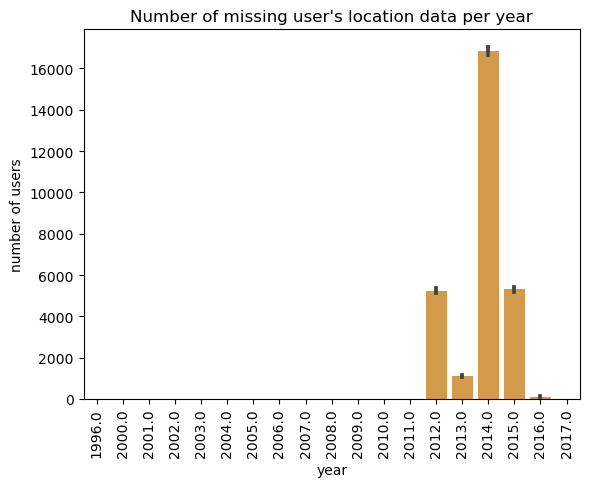

In [12]:
missing_location_by_joined_year = BA_users_raw.loc[:, ['joined', 'location']]
missing_location_by_joined_year['location'] = pd.isna(missing_location_by_joined_year['location']).astype('int')
missing_location_by_joined_year['joined'] = missing_location_by_joined_year['joined'].dt.year
sns.barplot(missing_location_by_joined_year, y='location', x='joined', estimator='sum', color='#eb9e34')
plt.title("Number of missing user's location data per year")
plt.xlabel('year')
plt.ylabel('number of users')
plt.xticks(rotation=90)
plt.show()

We noticed that first missing data about location is from 2012

In [13]:
# drop the value without joined time - as there are only 1.7 % of such user
BA_users = BA_users_raw.dropna(subset='joined').copy()

# change Nan values to undefined label - as removing them from dataset will result in big information loss
BA_users = BA_users.fillna('Undefined')

#### c) Beers

In [14]:
print(BA_beers_raw.isna().mean())

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
avg                          0.116903
ba_score                     0.782069
bros_score                   0.979695
abv                          0.128280
avg_computed                 0.116946
zscore                       0.856547
nbr_matched_valid_ratings    0.000000
avg_matched_valid_ratings    0.899324
dtype: float64


Many values are missing in ba_score and bros_score column. In fact, those scores are only calculated for beers that have more than 10 ratings. We decided to check how many ratings refer to with beers with and without overall_score defined. 

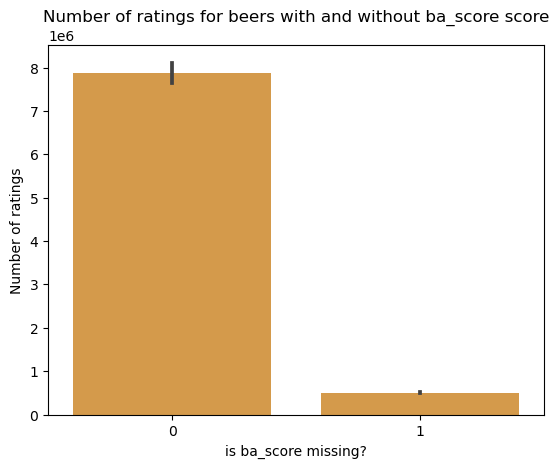

In [15]:
sns.barplot(BA_beers_raw, estimator='sum', x=pd.isna(BA_beers_raw['ba_score']).astype('int'), y='nbr_ratings', color='#eb9e34')
plt.xlabel("is ba_score missing?")
plt.ylabel('Number of ratings')
plt.title('Number of ratings for beers with and without ba_score score')
plt.show()

Although there are fewer then 25% of beers with defined ba_score in the dataset, there are many more ratings concerning they as there are the most popular. Because of that fact we decided not to remove those values but encode missing values with -1. 

In [16]:
# removing columns with more than 90% of missing values
BA_beers = BA_beers_raw.drop(['zscore', 'avg_matched_valid_ratings'], axis=1).copy()

# removing beers that have 0 reviews
BA_beers = BA_beers[BA_beers['nbr_ratings'] > 0]

print(BA_beers.isna().mean())

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
avg                          0.000000
ba_score                     0.753212
bros_score                   0.977006
abv                          0.124505
avg_computed                 0.000000
nbr_matched_valid_ratings    0.000000
dtype: float64


In [17]:
# encode remaining Nans in overall_score and style_score with 
BA_beers = BA_beers.fillna(-1)

#### d) Ratings

In [18]:
print(BA_ratings_raw.isna().mean())

beer_name       0.00000
beer_id         0.00000
brewery_name    0.00000
brewery_id      0.00000
style           0.00000
abv             0.02041
date            0.00000
user_name       0.00000
user_id         0.00000
appearance      0.43171
aroma           0.43171
palate          0.43171
taste           0.43171
overall         0.43171
rating          0.00000
dtype: float64


In [19]:
# dropping row with missing information about abv
BA_ratings = BA_ratings_raw.dropna(subset='abv').copy()

#### e) Groups

In [20]:
print(BA_groups_raw.isna().mean())

Unnamed: 0      0.0
year            0.0
brewery_name    0.0
group           0.0
main_group      0.0
dtype: float64


In [21]:
BA_groups = BA_groups_raw.drop(columns=['Unnamed: 0' ])

### 3. Dataframe merging

In [23]:
# merge beers df with location of brewery that brewed them
BA_beers_with_brewery_location = BA_beers.merge(BA_breweries[['location', 'id']], left_on='brewery_id', right_on='id', how='left')

# print columns of resulting df with percentage of missing values in each
print(BA_beers_with_brewery_location.isna().mean())

beer_id                      0.0
beer_name                    0.0
brewery_id                   0.0
brewery_name                 0.0
style                        0.0
nbr_ratings                  0.0
nbr_reviews                  0.0
avg                          0.0
ba_score                     0.0
bros_score                   0.0
abv                          0.0
avg_computed                 0.0
nbr_matched_valid_ratings    0.0
location                     0.0
id                           0.0
dtype: float64


In [24]:
# merge ratings df with group that produced rated beer (currently only AB InBev) based on brewery name and year of review
BA_ratings_with_groups = BA_ratings.merge(BA_groups,left_on=['brewery_name', BA_ratings['date'].apply(lambda x: x.year)],
                                                    right_on=['brewery_name', 'year'],
                                                    how='left')

# replace name of group for other beers
BA_ratings_with_groups['group'] = BA_ratings_with_groups['group'].fillna('Other')
BA_ratings_with_groups['main_group'] = BA_ratings_with_groups['main_group'].fillna('Other')
BA_ratings_with_groups = BA_ratings_with_groups.dropna(subset= ['overall','appearance', 'taste', 'aroma', 'palate'])

# print columns of resulting df with percentage of missing values in each
print(BA_ratings_with_groups.isna().mean())

beer_name       0.0
beer_id         0.0
brewery_name    0.0
brewery_id      0.0
style           0.0
abv             0.0
date            0.0
user_name       0.0
user_id         0.0
appearance      0.0
aroma           0.0
palate          0.0
taste           0.0
overall         0.0
rating          0.0
year            0.0
group           0.0
main_group      0.0
dtype: float64


In [25]:
# merge ratings_group df with information about users
BA_ratings_with_groups_and_users = BA_ratings_with_groups.merge(BA_users[['joined', 'location', 'nbr_ratings', 'user_id']], on='user_id')
BA_ratings_with_groups_and_users = BA_ratings_with_groups_and_users.rename(columns={
    'nbr_ratings': 'total_user_nbr_ratings',
    'location': 'user_location',
    'joined': 'user_joined'
    })

# print columns of resulting df with percentage of missing values in each
print(BA_ratings_with_groups_and_users.isna().mean())

beer_name                 0.0
beer_id                   0.0
brewery_name              0.0
brewery_id                0.0
style                     0.0
abv                       0.0
date                      0.0
user_name                 0.0
user_id                   0.0
appearance                0.0
aroma                     0.0
palate                    0.0
taste                     0.0
overall                   0.0
rating                    0.0
year                      0.0
group                     0.0
main_group                0.0
user_joined               0.0
user_location             0.0
total_user_nbr_ratings    0.0
dtype: float64


In [28]:
# inner merge breweries with groups owning them
# equivalent to selecting only InBev breweries from dataset
BA_group_breweries = BA_breweries.merge(BA_groups, left_on='name', right_on='brewery_name') 

### 4. Datasets exploration

#### a. Breweries

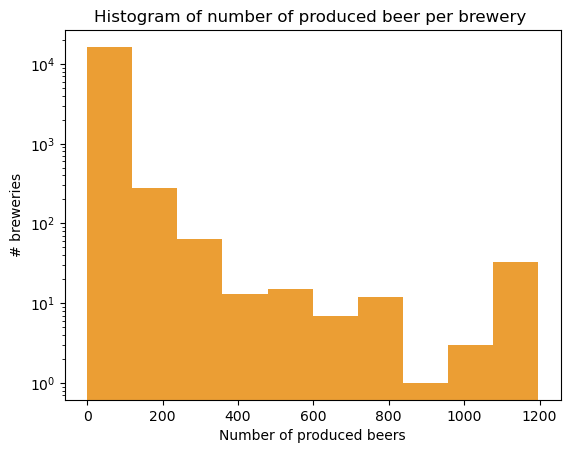

In [27]:
plt.hist(x=BA_breweries['nbr_beers'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of produced beer per brewery ')
plt.xlabel('Number of produced beers')
plt.ylabel('# breweries')
plt.show()

To obtain reasonable plot we have to set log-scale on y-axis. The distribution in heavily right skewed, follow a power law. It means that there are many breweries that produce only few kind of beers and there are some that produce a lot.   

In [ ]:
# print top 10 locations based on number of breweries
BA_breweries.groupby('location')['id'].count().sort_values(ascending=False).head(10)

location
Germany                      1431
England                       997
United States, California     929
Canada                        775
United States, Washington     411
United States, New York       406
United States, Colorado       404
France                        402
Australia                     401
Italy                         369
Name: id, dtype: int64

In [ ]:
# print top 10 locations based on number of produced beers
BA_breweries.groupby('location')['nbr_beers'].sum().sort_values(ascending=False).head(10)

location
United States, California       35587
United States, Pennsylvania     22710
United States, Colorado         18181
Canada                          16372
United States, Illinois         14993
United States, New York         13179
United States, Oregon           11973
United States, Florida          11415
United States, Washington       10786
United States, Massachusetts    10507
Name: nbr_beers, dtype: int64

It seems interesting that in some states there are so many different beers types, despite them not being in the top 10 based on number of breweries.

In [ ]:
print(scipy.stats.pearsonr(BA_breweries.groupby('location')['nbr_beers'].sum(), BA_breweries.groupby('location')['id'].count()))

PearsonRResult(statistic=0.7192204578046338, pvalue=1.424810416000745e-48)


But correlation between the number of breweries and the number of different beer types produced is strong, which seems very intuitive.

#### b. Beers

In [ ]:
BA_beers_with_brewery_location.describe()

,beer_id,brewery_id,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,nbr_matched_valid_ratings,id
count,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000,247982.000000
mean,143980.462655,20485.831883,33.845327,10.442637,3.721189,20.133272,0.973002,5.602292,3.717594,1.165508,20485.831883
std,84111.328529,15188.054822,245.558727,73.197759,0.475414,36.975060,12.959274,3.158204,0.464248,18.400635,15188.054822
min,3.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000
25%,72591.250000,3273.000000,1.000000,0.000000,3.500000,-1.000000,-1.000000,4.700000,3.500000,0.000000,3273.000000
50%,138899.500000,22618.000000,3.000000,1.000000,3.780000,-1.000000,-1.000000,5.800000,3.770000,0.000000,22618.000000
75%,217918.750000,33103.000000,9.000000,3.000000,4.010000,-1.000000,-1.000000,7.200000,4.000000,0.000000,33103.000000
max,293296.000000,49815.000000,16509.000000,3899.000000,5.000000,100.000000,100.000000,67.500000,5.000000,2968.000000,49815.000000


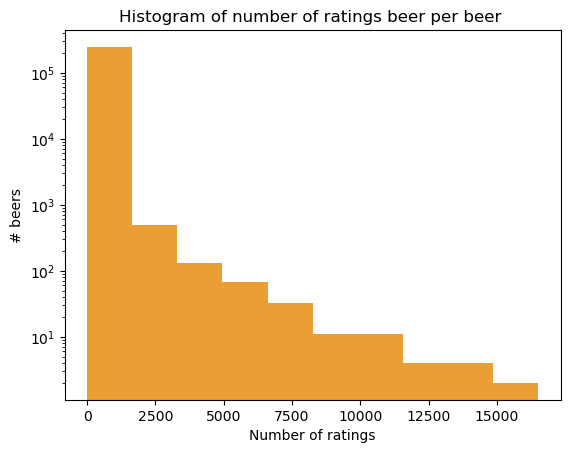

In [ ]:
plt.hist(BA_beers_with_brewery_location['nbr_ratings'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of ratings beer per beer ')
plt.xlabel('Number of ratings')
plt.ylabel('# beers')
plt.show()

Distribution of number of ratings per beer is also right skewed and must be ploted on chart with log y-axis. There are many beers with only few ratings and some beers with a large number (up to 15000).

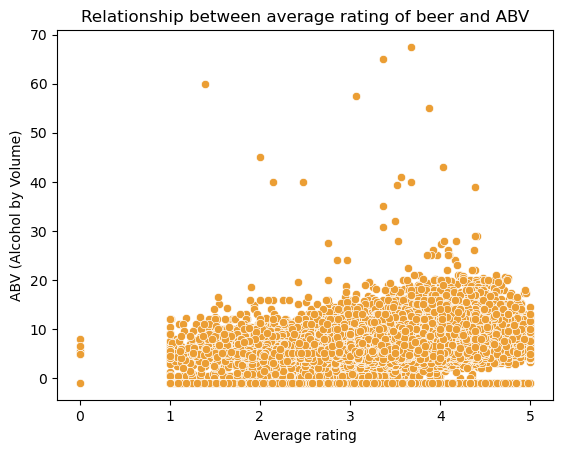

In [ ]:
# plot the relationship between ABV and average rating for all beers
sns.scatterplot(BA_beers_with_brewery_location, x='avg', y='abv', color='#eb9e34')
plt.title('Relationship between average rating of beer and ABV')
plt.xlabel('Average rating')
plt.ylabel('ABV (Alcohol by Volume)')
plt.show()

In [ ]:
scipy.stats.pearsonr(BA_beers_with_brewery_location['abv'], BA_beers_with_brewery_location['avg'])

PearsonRResult(statistic=0.2106111784400225, pvalue=0.0)

The correlation between ABV and rating of the beer is positive but weak. It is visible also in the scatterplot.

#### c. Users

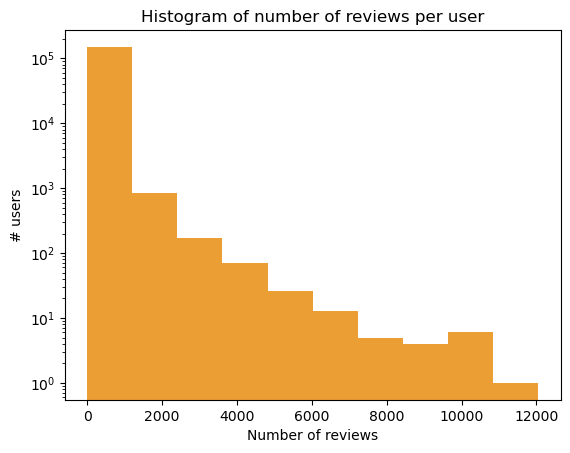

In [ ]:
plt.hist(x=BA_users['nbr_ratings'], color='#eb9e34')
plt.yscale('log')
plt.title('Histogram of number of reviews per user')
plt.xlabel('Number of reviews')
plt.ylabel('# users')
plt.yscale('log')

In [ ]:
# users by location
print(BA_users.groupby('location')['user_id'].count().sort_values(ascending=False).head(10), '\n\n')
users_from_USA = len(BA_users[BA_users['location'].str.contains('United States')])


location
Undefined                       28627
United States, California       11638
United States, Pennsylvania      8689
United States, New York          7432
United States, Illinois          6866
United States, Massachusetts     6658
United States, Texas             5893
United States, Ohio              4776
United States, Florida           4604
United States, Michigan          4213
Name: user_id, dtype: int64 




In [ ]:
print(f'Users from USA combined: {users_from_USA}')
print(f'Fraction of users from USA combined: {users_from_USA/len(BA_users)}')

Users from USA combined: 113223
Fraction of users from USA combined: 0.749563064375182


In [ ]:
print(BA_users.groupby('location')['nbr_ratings'].sum().sort_values(ascending=False).head(10), '\n\n')
nbr_ratings_from_USA = BA_users[BA_users['location'].str.contains('United States')]['nbr_ratings'].sum()

location
United States, California       658200
United States, Pennsylvania     654042
United States, Illinois         552906
United States, New York         492720
United States, Massachusetts    414197
United States, Texas            364368
United States, Ohio             310568
Canada                          274512
United States, New Jersey       273817
United States, Florida          246940
Name: nbr_ratings, dtype: int64 




In [ ]:
print(f'Number of ratings posted by users from USA combined: {nbr_ratings_from_USA}')
print(f"Fraction of ratings posted by users from USA combined: {nbr_ratings_from_USA/BA_users['nbr_ratings'].sum()}")

Number of ratings posted by users from USA combined: 7303870
Fraction of ratings posted by users from USA combined: 0.9078630618823355


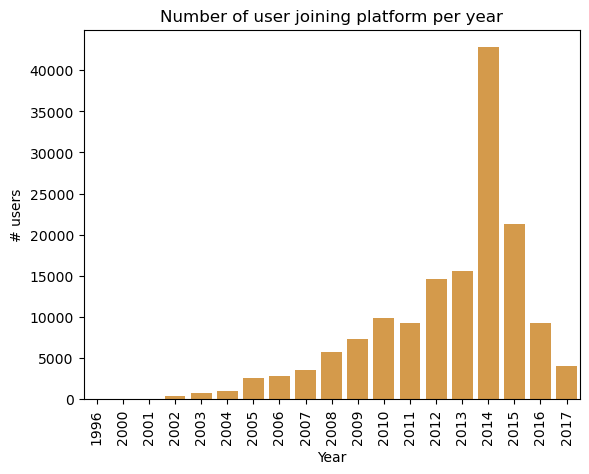

In [ ]:
sns.countplot(BA_users, x=BA_users['joined'].dt.year, color='#eb9e34')
plt.title('Number of user joining platform per year')
plt.xlabel('Year')
plt.ylabel('# users')
plt.xticks(rotation=90)
plt.show()

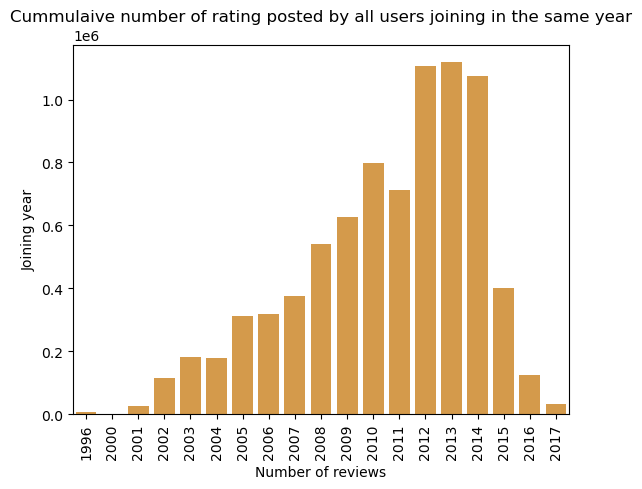

In [ ]:
number_of_revievs_by_join_year = BA_users.groupby(BA_users['joined'].dt.year)['nbr_ratings'].sum()
sns.barplot(x=number_of_revievs_by_join_year.index, y=number_of_revievs_by_join_year.values, color='#eb9e34')
plt.title('Cummulaive number of rating posted by all users joining in the same year')
plt.xlabel('Number of reviews')
plt.ylabel('Joining year')
plt.xticks(rotation=90)
plt.show()

#### d. Ratings

In [ ]:
BA_ratings_with_groups_and_users.describe()

,beer_id,brewery_id,abv,date,appearance,aroma,palate,taste,overall,rating,year,user_joined,total_user_nbr_ratings
count,4.489635e+06,4.489635e+06,4.489635e+06,4489635,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4.489635e+06,4489635,4.489635e+06
mean,7.911186e+04,1.037520e+04,7.294480e+00,2013-07-01 20:52:28.541741056,3.939278e+00,3.871980e+00,3.868455e+00,3.906621e+00,3.903030e+00,3.896983e+00,2.013031e+03,2010-07-23 05:06:23.359003392,1.381421e+03
min,5.000000e+00,1.000000e+00,1.000000e-02,1996-08-22 10:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.996000e+03,1996-08-23 10:00:00,1.000000e+00
25%,1.154200e+04,2.030000e+02,5.500000e+00,2011-02-08 11:00:00,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.620000e+00,2.011000e+03,2007-10-28 11:00:00,2.370000e+02
50%,5.688000e+04,1.199000e+03,6.800000e+00,2015-03-04 11:00:00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.990000e+00,2.015000e+03,2010-10-30 10:00:00,7.490000e+02
75%,1.259260e+05,2.243900e+04,8.600000e+00,2016-02-19 11:00:00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00,2.016000e+03,2014-01-01 11:00:00,1.779000e+03
max,2.932960e+05,4.981500e+04,6.750000e+01,2017-08-01 10:00:00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,2.017000e+03,2017-07-31 10:00:00,1.204600e+04
std,7.568659e+04,1.328293e+04,2.436737e+00,NaN,5.572811e-01,6.188636e-01,6.061377e-01,6.407802e-01,6.131690e-01,5.697082e-01,3.571125e+00,NaN,1.784707e+03


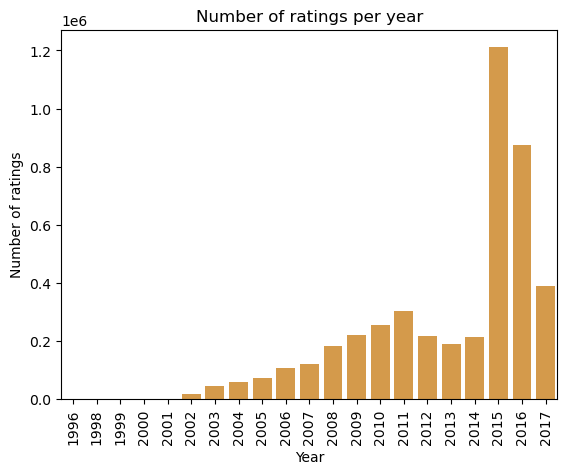

In [ ]:
sns.countplot(BA_ratings_with_groups_and_users, x=BA_ratings_with_groups_and_users['date'].dt.year, color='#eb9e34')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of ratings')
plt.title('Number of ratings per year')
plt.show()

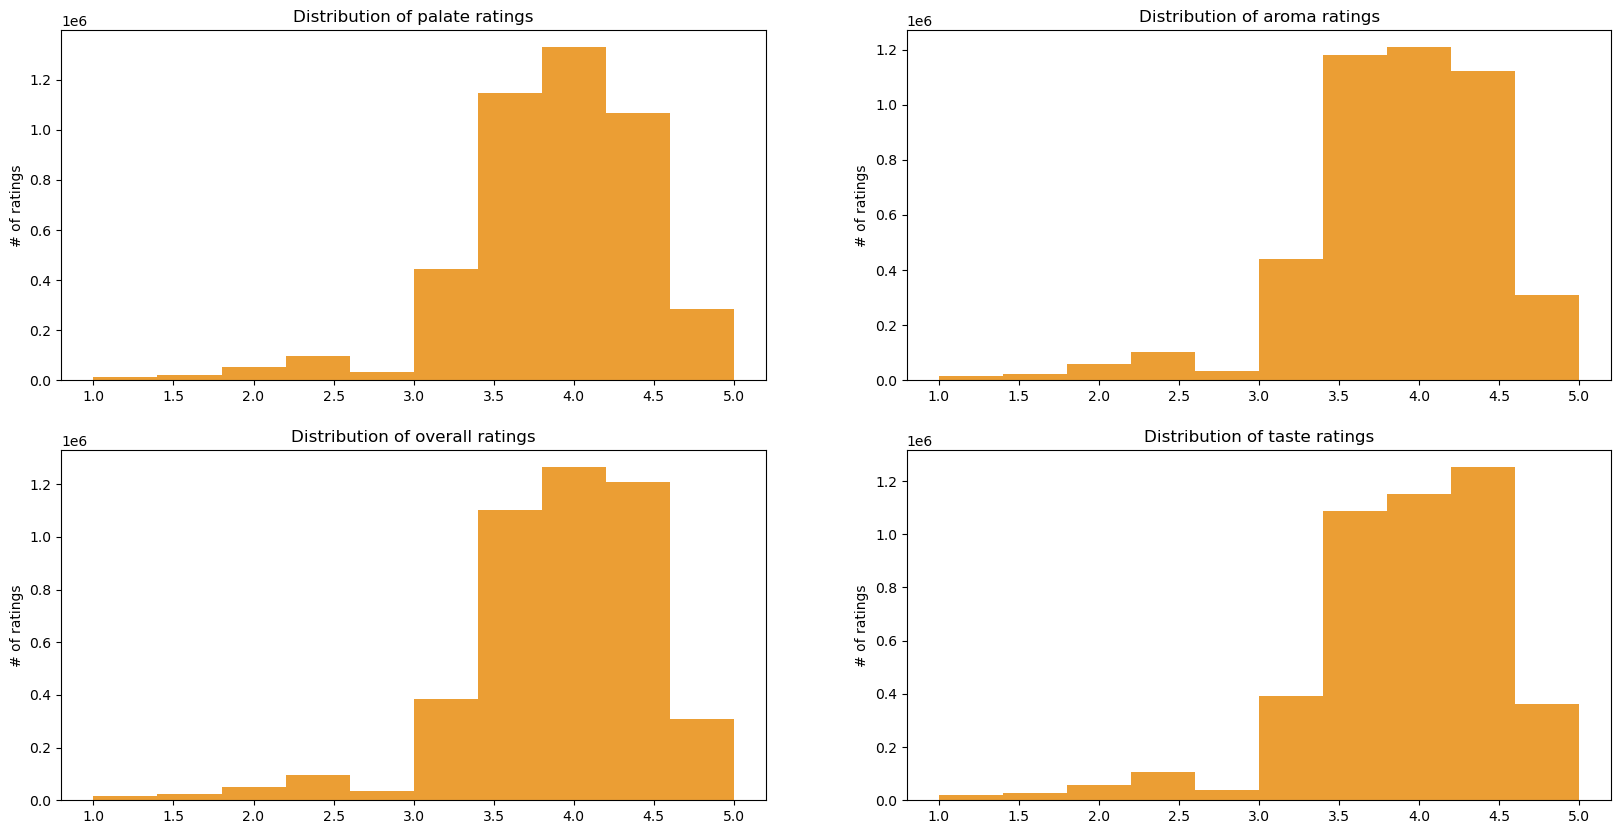

In [ ]:
# plot distribution of different ratings aspects
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
plt.hist(BA_ratings_with_groups_and_users['palate'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of palate ratings')
plt.subplot(2, 2, 2)
plt.hist(BA_ratings_with_groups_and_users['aroma'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of aroma ratings')
plt.subplot(2, 2, 3)
plt.hist(BA_ratings_with_groups_and_users['overall'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of overall ratings')
plt.subplot(2, 2, 4)
plt.hist(BA_ratings_with_groups_and_users['taste'], color='#eb9e34')
plt.ylabel('# of ratings')
plt.title('Distribution of taste ratings')
plt.show()


The distribution of each ratings are really similar

### 5. Research Question Analysis

In [60]:
# create dataframe with number of breweries owned by each group by year
years_groups_comparison = BA_group_breweries.groupby(['year', 'group']).nunique().loc[: , ['brewery_name']].unstack(level=1).droplevel(0, axis=1).fillna(0).astype('int')
display(years_groups_comparison)

group,AB,ABInBev,Ambev,Asahi,Carlsberg,Coors,Diageo,GroupoModelo,Heineken,Inbev,Interbrew,Molson,MolsonCoors,SABMiller
year,,,,,,,,,,,,,,
2000,1,0,4,2,41,2,9,1,35,0,33,1,0,11
2001,1,0,4,2,41,2,9,1,35,0,36,1,0,12
2002,1,0,5,2,41,4,9,1,37,0,39,1,0,13
2003,1,0,5,2,42,4,9,1,43,0,40,1,0,14
2004,2,0,0,2,43,4,9,1,46,47,0,1,0,14
2005,2,0,0,2,44,0,9,1,52,48,0,0,6,18
2006,2,0,0,2,44,0,9,1,52,49,0,0,6,18
2007,2,0,0,2,44,0,9,1,53,50,0,0,6,18
2008,0,50,0,2,43,0,9,1,64,0,0,0,6,18


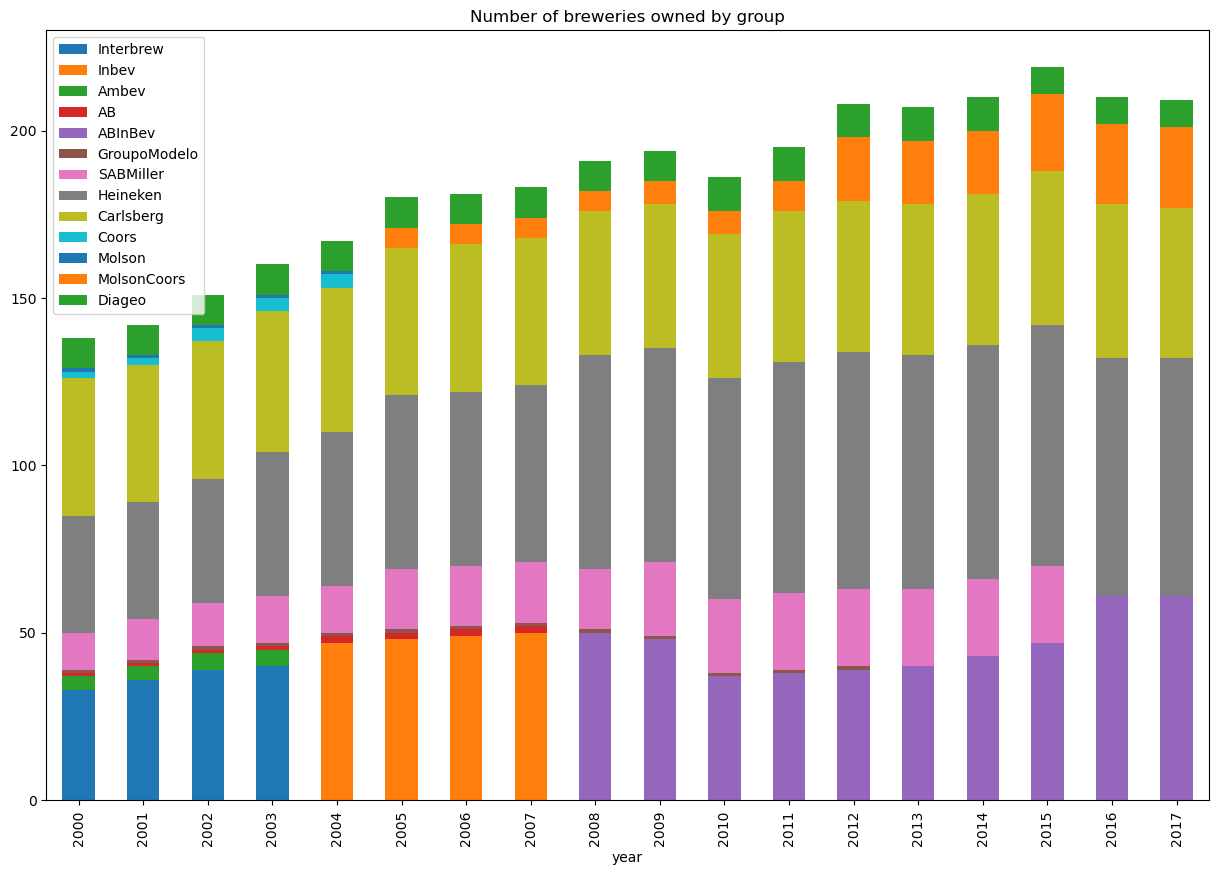

In [71]:
# order companies, so that ones that merged in some point are displayed together
# colors probably should be improved
columns_order = ['Interbrew', 'Inbev', 'Ambev', 'AB', 'ABInBev', 'GroupoModelo', 'SABMiller', 'Heineken', 'Carlsberg', 'Coors', 'Molson', 'MolsonCoors', 'Diageo']
years_groups_comparison = years_groups_comparison[columns_order]

# plot the data
years_groups_comparison.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Number of breweries owned by group')
plt.legend()


We can see on the plot, that the number of breweries belonging to big groups grows across years, but the increase wasn't very big. We can also observe the process of groups merging. 

,beer_name
main_group,
Asahi,2545
Carslberg,11355
Diageo,15996
Heineken,52027
InBev,123917
MolsonCoors,36361
Other,4247434


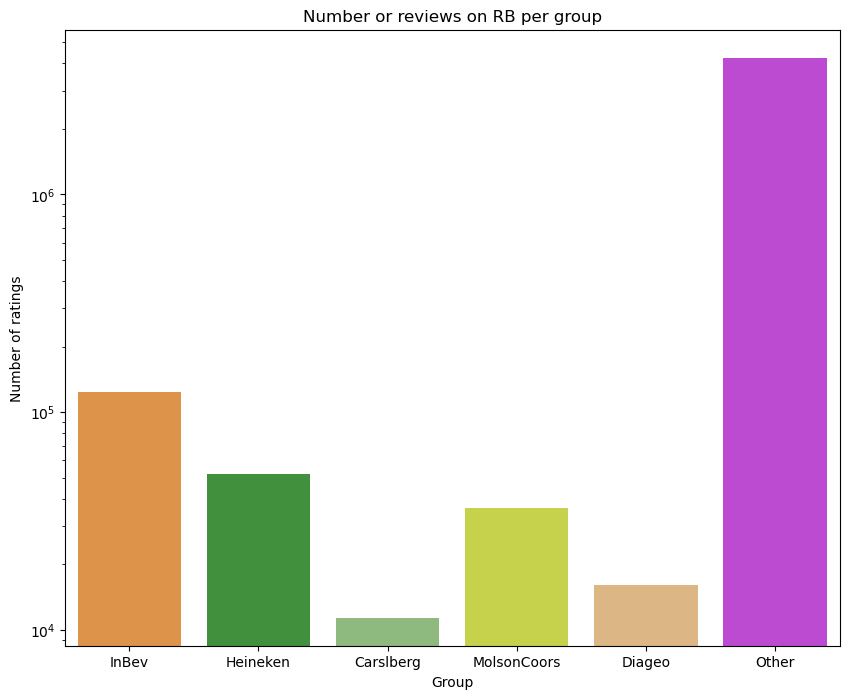

In [75]:
# calculate total number of ratings per group - groups names as in 2017
number_of_groups_reviews = (BA_ratings_with_groups_and_users.groupby('main_group').count()['beer_name']).to_frame()
display(number_of_groups_reviews)

# plot the results
sns.barplot(number_of_groups_reviews, x=number_of_groups_reviews.index, y='beer_name', order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Number or reviews on RB per group')
plt.ylabel('Number of ratings')
plt.xlabel('Group')
plt.yscale('log')
number_of_groups_reviews.to_csv('nb_of_reviews.csv')

It may be surprising, but beside the fact that big companies produced about 50% of beer volume worldwide in 2016, only small percentage of all ratings concern them (about 5%) 

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Molson-Coors,2.414415e+09,2.429462e+09,3.776322e+09,4.000113e+09,4.305816e+09,5.506906e+09,5.844985e+09,6.190592e+09,4774300000,3032400000,3254400000,3515700000,3916500000,4206100000,4146300000,3567500000,4885000000
AB inBev,5.317204e+09,6.499492e+09,7.341600e+09,8.875440e+09,1.165248e+10,1.375408e+10,1.756656e+10,2.106780e+10,22542800000,33862000000,36297000000,39046000000,39758000000,43195000000,47063000000,43604000000,45517000000
Heineken,7.620580e+09,8.155070e+09,1.080765e+10,1.166130e+10,1.252152e+10,1.141296e+10,1.393392e+10,1.641770e+10,20046600000,21022430000,21618220000,22088670000,24265560000,26500140000,23300970000,22356990000,21831600000
Carlsberg,3.206250e+09,4.061442e+09,4.976160e+09,5.817168e+09,6.639972e+09,6.049473e+09,7.264611e+09,8.815750e+09,11329416000,11460919000,10689612000,11075274000,11831304000,12245568000,10578984000,9313038000,8828574000
Asahi,9.862151e+09,8.406746e+09,8.901297e+09,1.033324e+10,1.050740e+10,8.698677e+09,8.465451e+09,9.061463e+09,10967099900,10293897722,11458920044,11972681215,10644621421,8796864608,7866032540,8092438679,8349863201
Diageo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2480394000,3318440400,3313464000,3348279000,3641729700,3940225800,3200496000,2861119800,2321379000


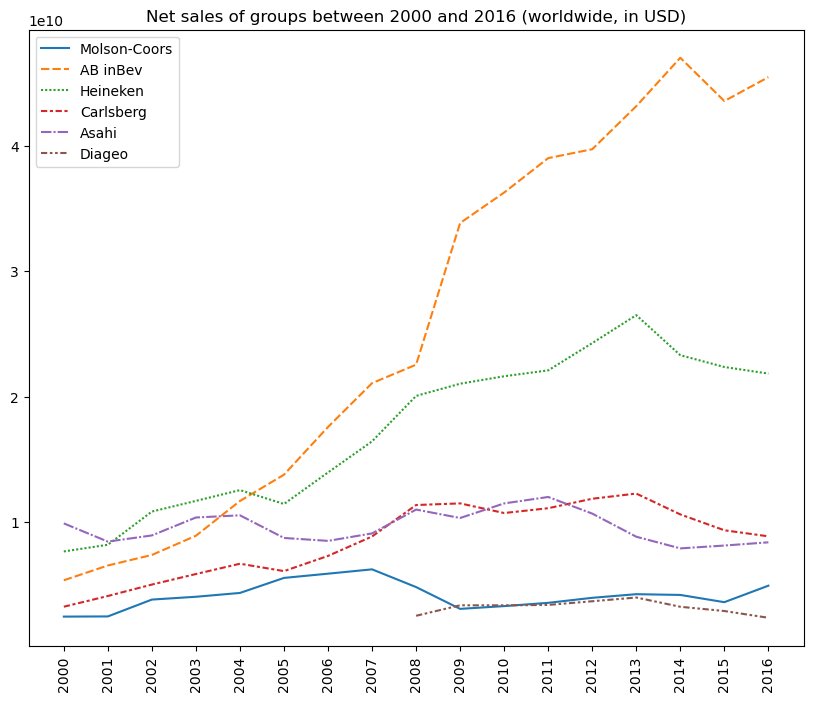

In [77]:
# load information about financial data
financial_results_df = pd.read_csv('./data/finacial_results(USD).csv', header=0, index_col=0)
display(financial_results_df)

# plot data
sns.lineplot(data=financial_results_df.T)
plt.title('Net sales of groups between 2000 and 2016 (worldwide, in USD)')
plt.xticks(rotation=90)
plt.show()

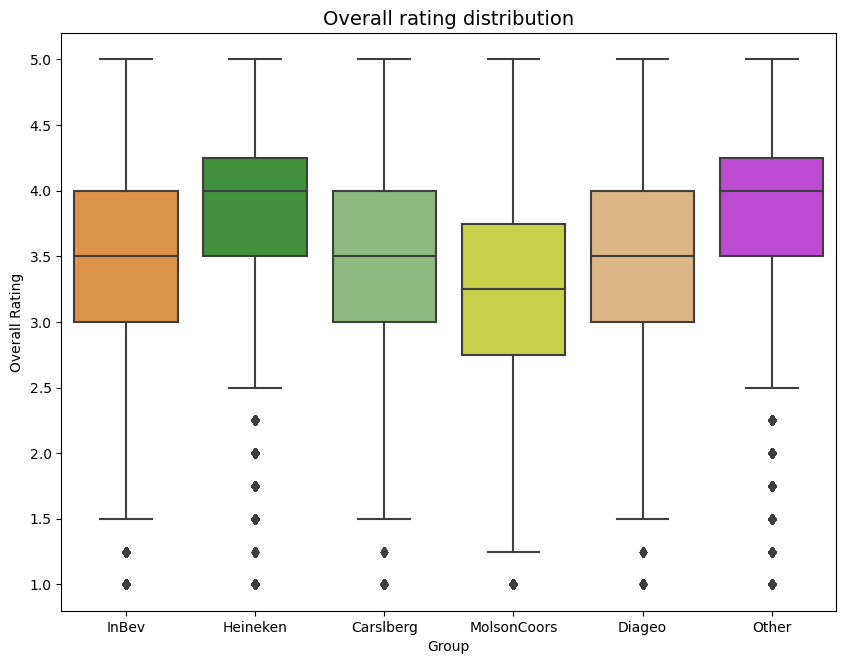

In [65]:
# plot the overall rating distribution per company before matching
ax = sns.boxplot(x="main_group", y="overall", data=BA_ratings_with_groups_and_users, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.title('Overall rating distribution', size = 14)
plt.ylabel('Overall Rating')
plt.xlabel('Group')
plt.show()

The group with the highest ranking is Heineken, and the average rating of their beers are very similar to average overall rating of other beers. 

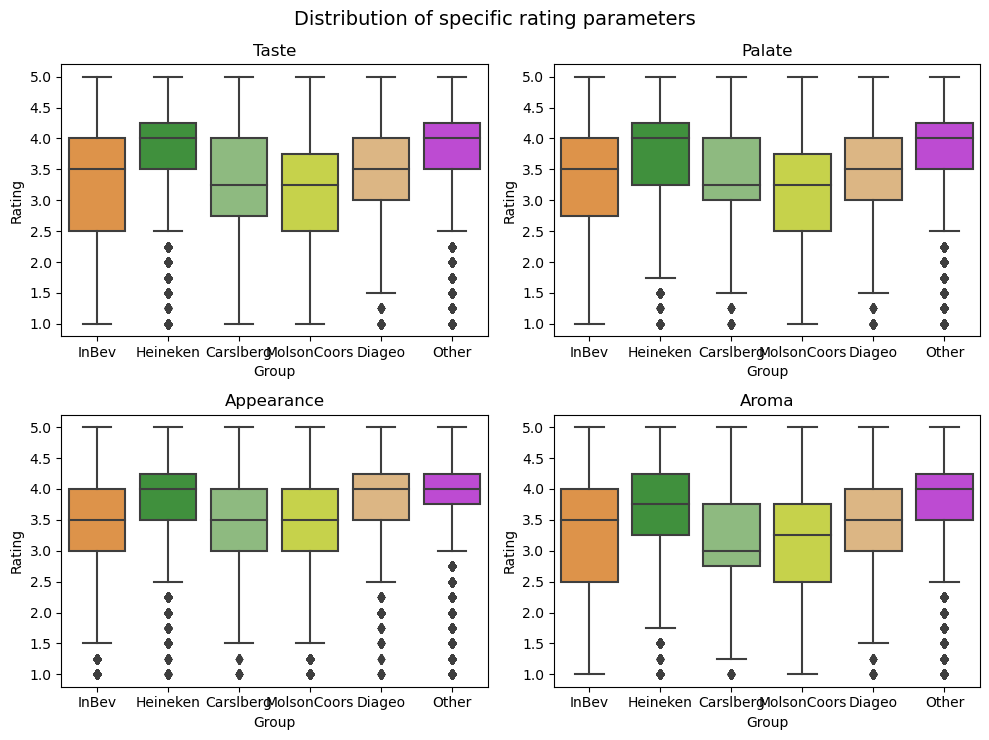

In [61]:
# Plot per group distribution of ratings parameters (Unmatched Data)
plt.rcParams["figure.figsize"] = (10,7.5)
plt.suptitle('Distribution of specific rating parameters', size=14)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=BA_ratings_with_groups_and_users, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=BA_ratings_with_groups_and_users, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=BA_ratings_with_groups_and_users, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=BA_ratings_with_groups_and_users, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.xlabel('Group')
plt.title('Aroma')
plt.tight_layout()



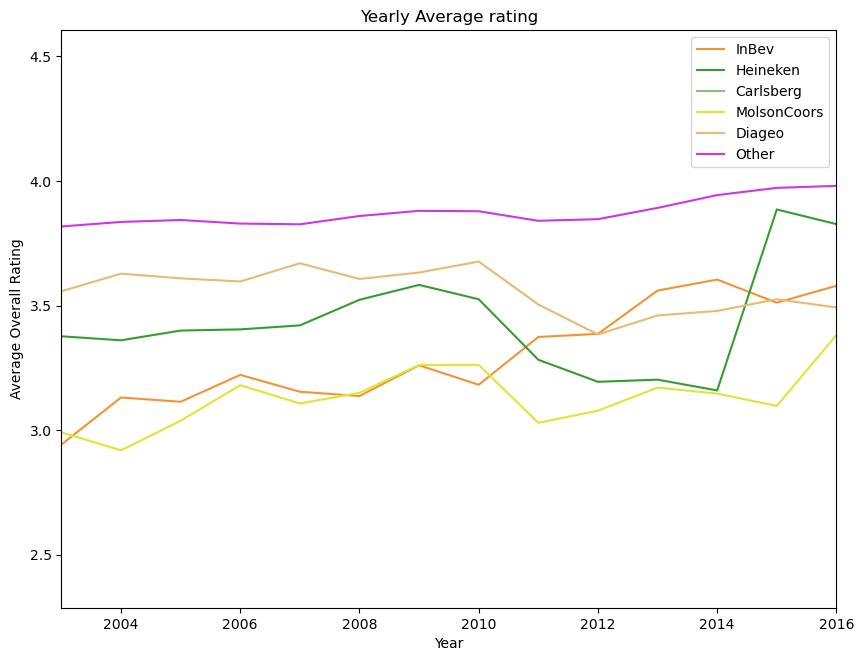

In [64]:
# Plotting yearly average overall rating per company group 

yearly = BA_ratings_with_groups_and_users.groupby(['main_group', 'year'])[['overall'] ].mean().reset_index()

plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'InBev'], color='#f59331', label='InBev')
plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'Heineken'], color='#339e2f', label='Heineken')
plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'Carlsberg'], color='#89c476', label='Carlsberg')
plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'MolsonCoors'], color='#d9e835', label='MolsonCoors')
plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'Diageo'], color='#ebb875', label='Diageo')
plt.plot('year', 'overall', data= yearly[yearly['main_group']== 'Other'], color='#cd35e8', label='Other')
    
plt.legend()
plt.title('Yearly Average rating')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.xlim(right = 2016, left = 2003)



yearly2 = BA_ratings_with_groups_and_users.groupby(['main_group', 'year'])[['overall'] ].count().reset_index()

In [45]:
# Mapping beer styles to beer famillies
restructured_dict = {style: family for family, style in helpers.get_beer_style_mapping().items() for style in style} # Inversing keys and values 

BA_ratings_with_groups_and_users['beer_family'] = BA_ratings_with_groups_and_users['style'].apply(lambda style: helpers.map_style_to_family(style, restructured_dict))

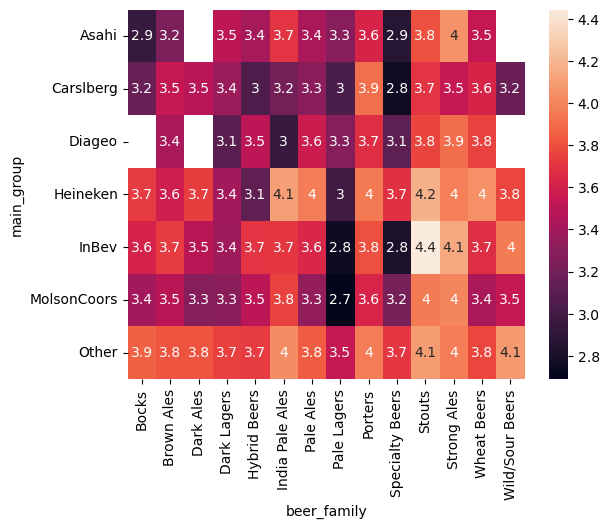

In [46]:
# Average rating of style of beers owned by the different groups
avg_rating_group_beerfamily = BA_ratings_with_groups_and_users.groupby(['main_group', 'beer_family'])['overall'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False).reset_index()
avg_rating_group_beerfamily = avg_rating_group_beerfamily.pivot(index= 'main_group', columns= 'beer_family', values='mean')
ax = sns.heatmap(avg_rating_group_beerfamily, annot=True ) # Plot


In [47]:
# Top 15 rated beers (with over 100 ratings)

beers = BA_ratings_with_groups_and_users.groupby(['main_group', 'beer_name', 'beer_family'])['overall'].agg(['count', 'mean', 'std']).sort_values('count', ascending=False).reset_index()
beers = beers[beers['count'] > 100] 
beers.sort_values('mean', ascending= False).head(15)


,main_group,beer_name,beer_family,count,mean,std
2646,Other,Kentucky Brunch Brand Stout,Stouts,312,4.836538,0.339228
738,Other,Good Morning,Stouts,860,4.786628,0.258096
2152,Other,King JJJuliusss,India Pale Ales,373,4.745979,0.308891
1452,Other,Barrel-Aged Abraxas,Stouts,518,4.745656,0.286892
3771,Other,ManBearPig,Stouts,222,4.740991,0.447375
1192,Other,Very Hazy,India Pale Ales,605,4.740083,0.282463
948,Other,King Julius,India Pale Ales,719,4.737135,0.297256
1331,Other,Hunahpu's Imperial Stout - Double Barrel Aged,Stouts,559,4.720036,0.337170
5243,Other,Drie Fonteinen Zenne Y Frontera,Wild/Sour Beers,157,4.714968,0.260144
6119,Other,Derivation Blend #1 (Maple Syrup Bourbon Barrel),Stouts,133,4.710526,0.386616


In [52]:
# Top 3 rated beers per company group (With over 100 ratings)
top_three_per_group = beers.groupby('main_group', as_index=False).apply(lambda x: x.nlargest(3, 'mean')).reset_index(drop=True)
display(top_three_per_group)

,main_group,beer_name,beer_family,count,mean,std
0,Asahi,Pilsner Urquell,Pale Lagers,375,3.648667,0.544232
1,Asahi,Asahi Black (Kuronama),Dark Lagers,174,3.573276,0.537621
2,Asahi,Grolsch Premium Lager,Pale Lagers,125,3.200000,0.606584
3,Carslberg,"Carnegie Porter 5,5%",Porters,399,4.177945,0.504044
4,Carslberg,Sinebrychoff Porter,Porters,660,4.167803,0.513997
5,Carslberg,Okocim Porter,Porters,462,4.067641,0.596126
6,Diageo,Guinness Special Export Stout / Antwerpen Stout,Stouts,348,4.102011,0.415838
7,Diageo,Guinness Foreign Extra Stout,Stouts,1068,4.076779,0.494657
8,Diageo,West Indies Porter,Porters,193,3.799223,0.424095
9,Heineken,High West-ified Imperial Coffee Stout,Stouts,1855,4.372507,0.291670


In [57]:
beers_sorted = beers.sort_values('mean', ascending=False).reset_index(drop=True)
for id, row in top_three_per_group.iterrows():  
    print(f'Best position of beer from {row["main_group"]} company: {beers_sorted[beers_sorted["beer_name"] == row["beer_name"]].index[0]+1}/{len(beers_sorted.index)}')


Best position of beer from Asahi company: 5198/7768
Best position of beer from Asahi company: 6673/7768
Best position of beer from Asahi company: 7418/7768
Best position of beer from Carslberg company: 1378/7768
Best position of beer from Carslberg company: 1447/7768
Best position of beer from Carslberg company: 2244/7768
Best position of beer from Diageo company: 1955/7768
Best position of beer from Diageo company: 2167/7768
Best position of beer from Diageo company: 4966/7768
Best position of beer from Heineken company: 470/7768
Best position of beer from Heineken company: 481/7768
Best position of beer from Heineken company: 714/7768
Best position of beer from InBev company: 13/7768
Best position of beer from InBev company: 18/7768
Best position of beer from InBev company: 21/7768
Best position of beer from MolsonCoors company: 723/7768
Best position of beer from MolsonCoors company: 608/7768
Best position of beer from MolsonCoors company: 1115/7768
Best position of beer from Other 

Even best Big Beers are generally lower in the ranking, than beers originated from small breweries

We know, that previously conducted analysis may be misleading - we didn't take into account other covariants that may influence score like personal preferences or beer type. Because of that we decided to perform two different matching and compare the ratings one more. In the first variant we match reviews written by the same user. In the second variant we matched reviews that concern similar beers in the meaning of abv and style.

#### User matched ratings

In [33]:
# Matching big and small beer reviews with user_id

# Filter out users that have not rated both big and small beers

'''ratings_2 = ba_ratings.groupby('user_id').filter(lambda x: set(x['size']) == {'Big', 'Small'})
'''
# Create a new DataFrame for matched reviews

'''matched_reviews_list = []


for user_id in ratings_2['user_id'].unique():
    user_reviews = ratings_2[ratings_2['user_id'] == user_id]
    big_reviews = user_reviews[user_reviews['size'] == 'Big']
    small_reviews = user_reviews[user_reviews['size'] == 'Small']

    # Ensure there are reviews to sample from
    if not big_reviews.empty and not small_reviews.empty:
        min_reviews = min(len(big_reviews), len(small_reviews))
        matched_big = big_reviews.sample(min_reviews)
        matched_small = small_reviews.sample(min_reviews)

        # Append matched reviews to the list
        matched_reviews_list.append(matched_big)
        matched_reviews_list.append(matched_small)

# Check if there are matched reviews to concatenate
if matched_reviews_list:
    # Concatenate all matched reviews into a single DataFrame
    matched_reviews = pd.concat(matched_reviews_list, ignore_index=True)
else:
    # Handle the case where no matching reviews are found
    matched_reviews = pd.DataFrame(columns=ratings_2.columns)
    print("No matching reviews found.")
'''


# to not perform matching every time, we save the data in csv file
matched_reviews = pd.read_csv('./data/matched_user_reviews.csv')

    


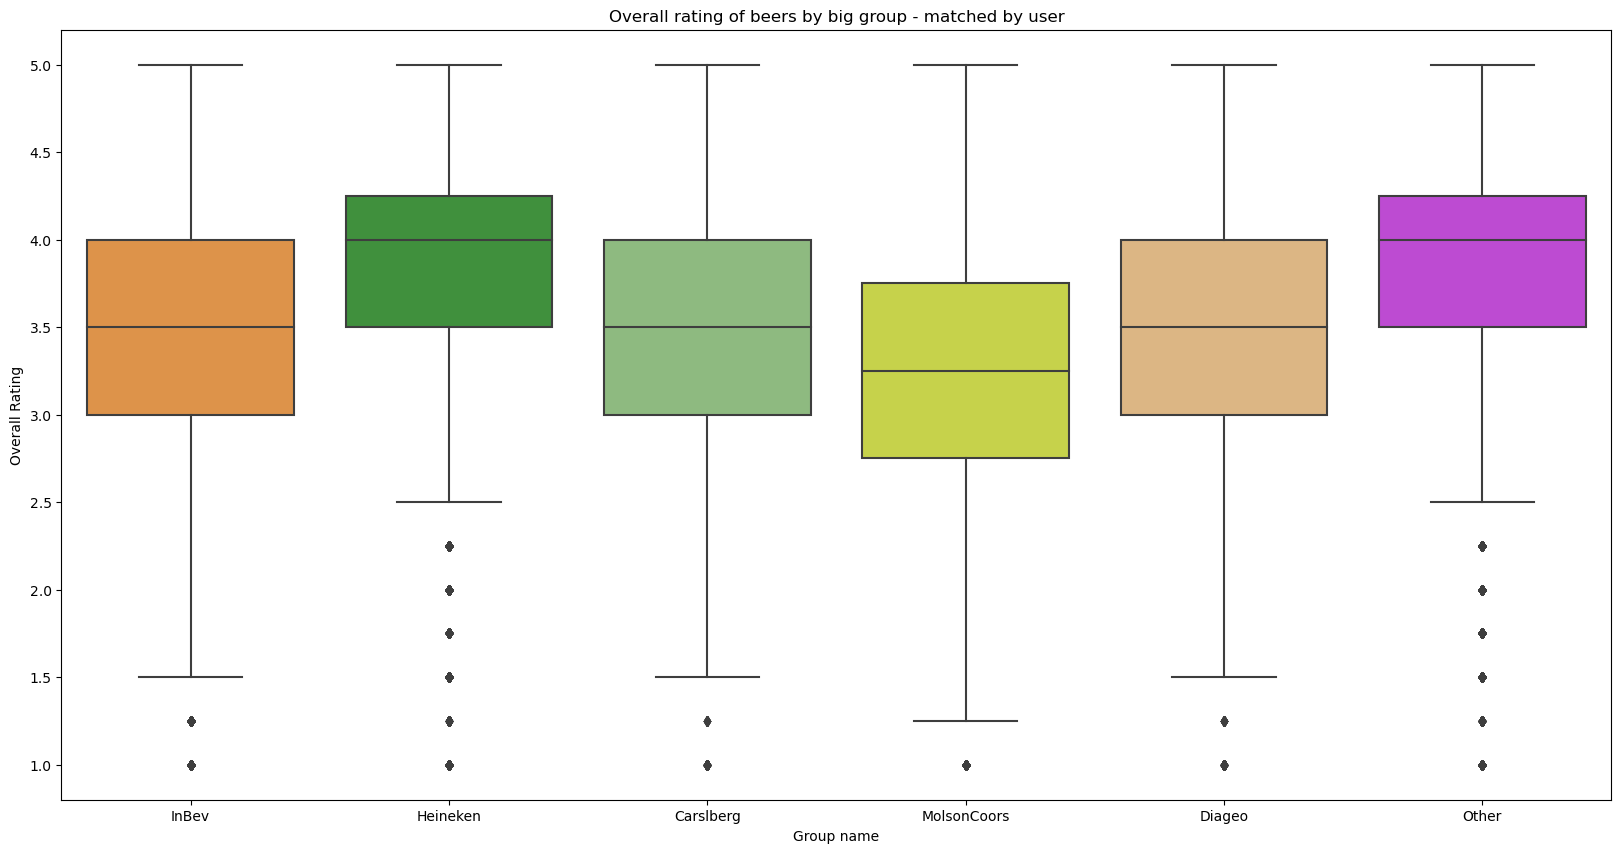

In [34]:
# Plotting overall rating per group (WITH USER MATCHING)

ax = sns.boxplot(x="main_group", y="overall", data=matched_reviews, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})

plt.title('Overall rating of beers by big group - matched by user')
plt.xlabel('Group name')
plt.ylabel('Overall Rating')
plt.savefig('user_matching.png', transparent=True)
plt.show()

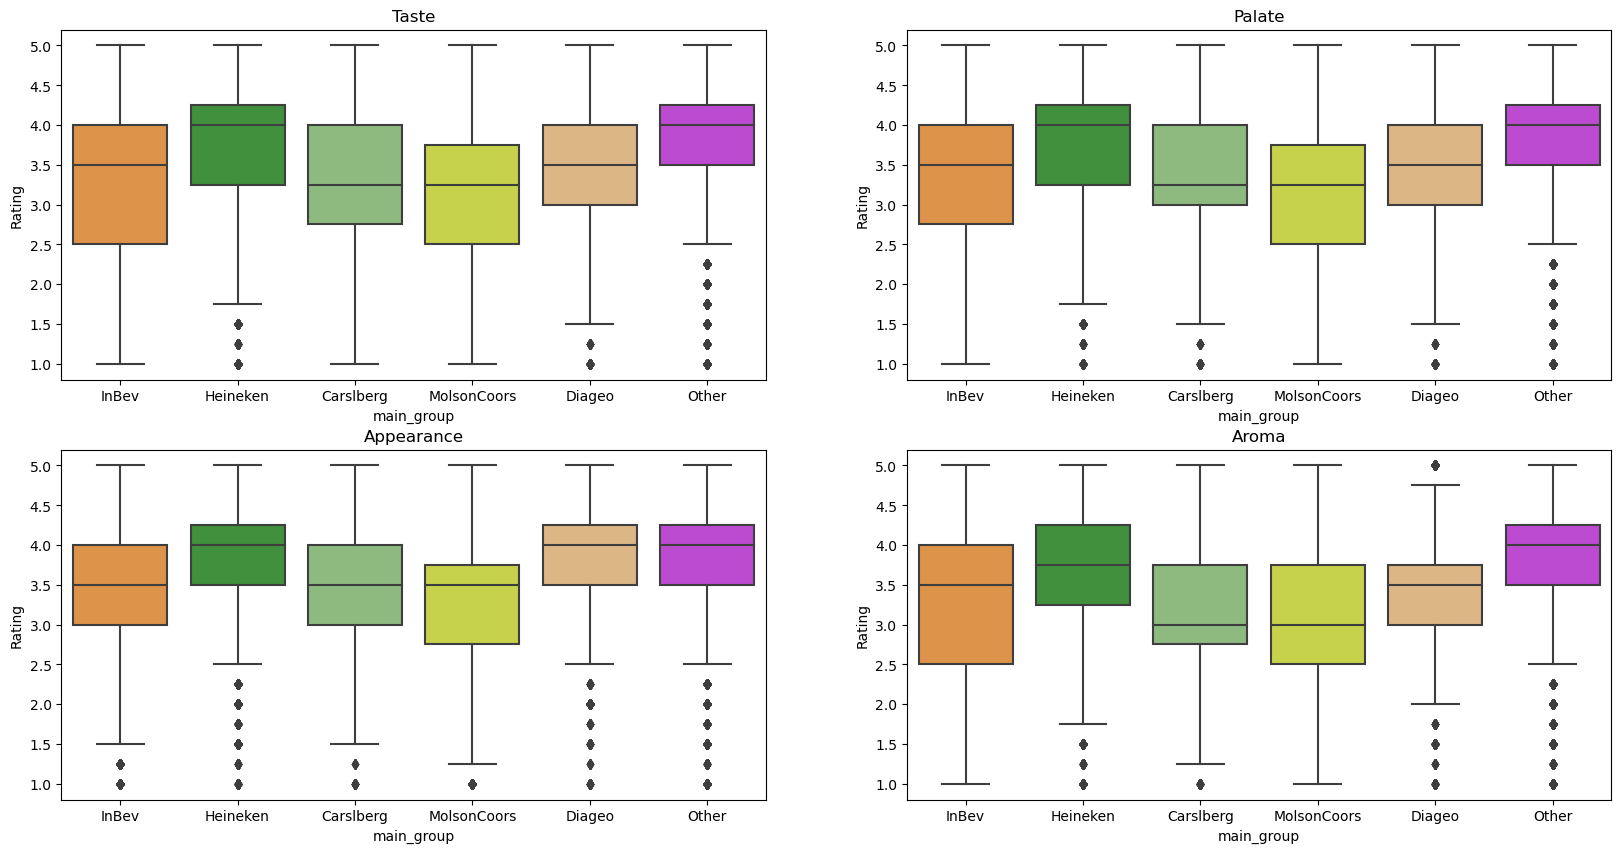

In [35]:
# Plot per group distribution of ratings parameters (Matched Data)

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=matched_reviews, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=matched_reviews, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=matched_reviews, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=matched_reviews, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



The obtained results is similar to the one before matching.

#### Big vs Small (Matched Data on Users)

Text(0, 0.5, 'Rating')

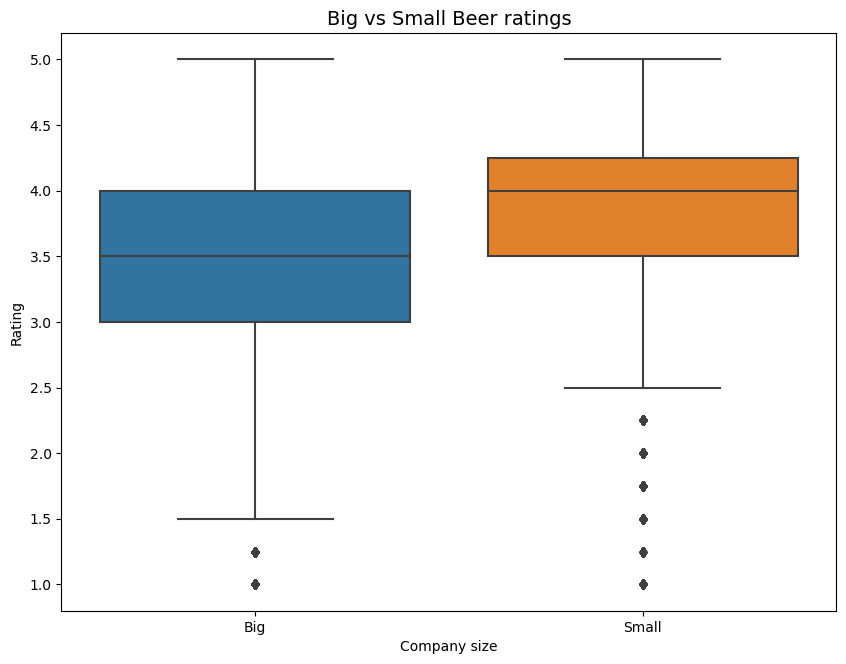

In [36]:
# Plotting overall rating per beer company size (WITH USER MATCHING)
plt.rcParams["figure.figsize"] = (10,7.5)


ax = sns.boxplot(x="size", y="overall", data=matched_reviews)
plt.title('Big vs Small Beer ratings', size = 14)
plt.xlabel('Company size')
plt.ylabel('Rating')



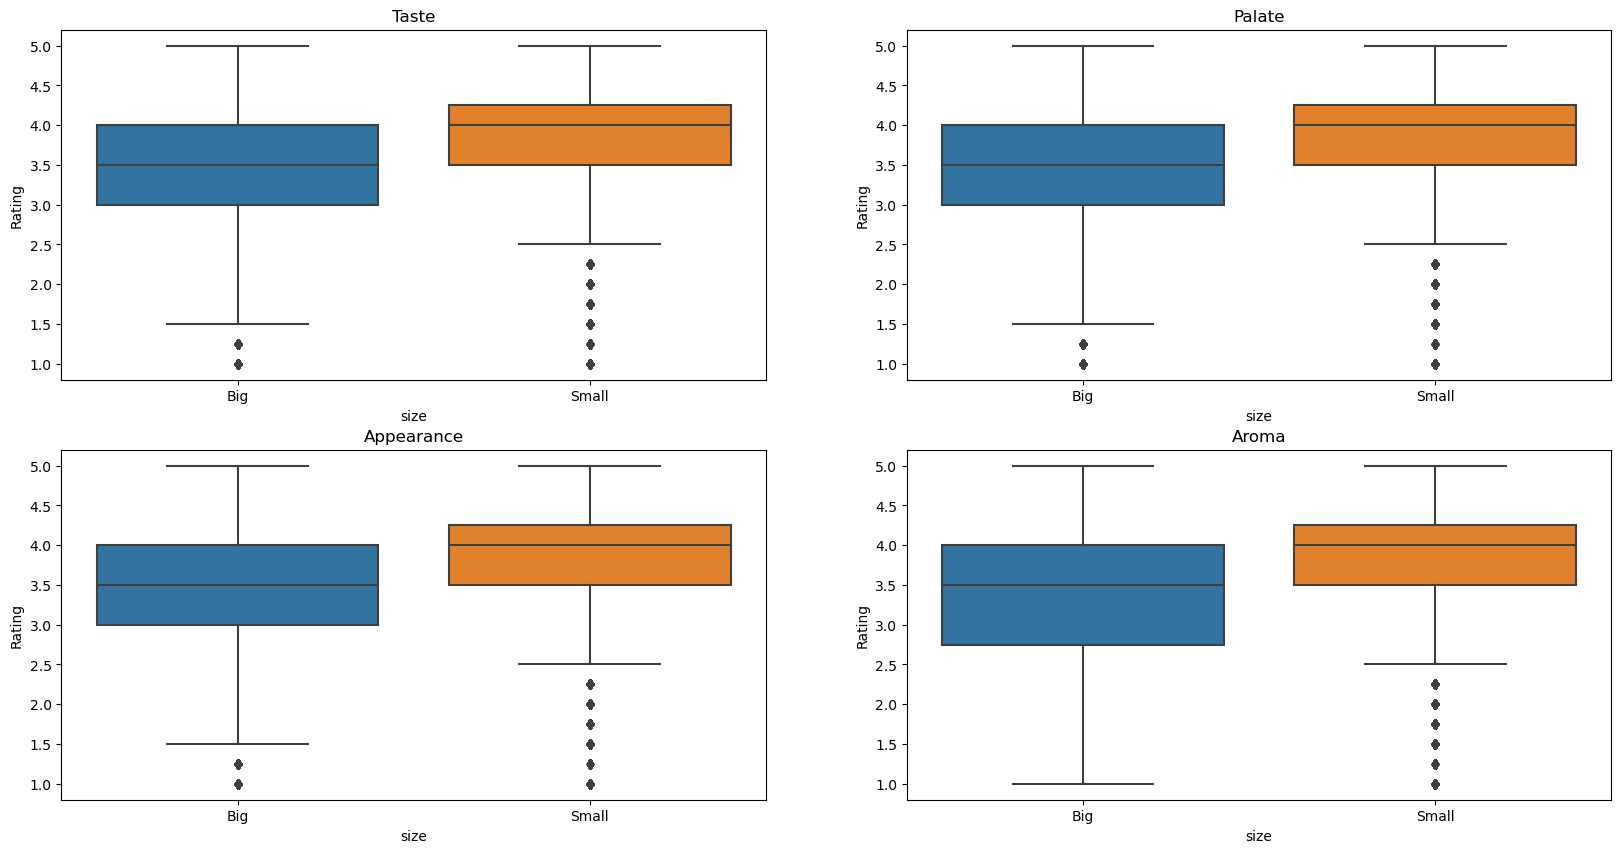

In [37]:
# Plot per group distribution of ratings parameters (WITH USER MATCHING)

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="size", y="taste", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="size", y="palate", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="size", y="appearance", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="size", y="aroma", data=matched_reviews)
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



In [38]:
# Running a t-test to check if difference is relevant

from scipy.stats import ttest_rel

big_beer_reviews = matched_reviews[matched_reviews['size']== 'Big']['overall'].values
small_beer_reviews = matched_reviews[matched_reviews['size']== 'Small']['overall'].values
ttest_rel(big_beer_reviews,small_beer_reviews )



TtestResult(statistic=-190.9487533492339, pvalue=0.0, df=225269)

On plot we can see that big beers are rated lower in each of the categories. Also conducted ttest show that the difference is significant. This means that we can reject the null hypothesis, and conclude that small beers are better rated.

#### Matched data on ABV and style 

In [53]:
# read matched df based on beer properties
# code of matching in helpers
matched_abv_style = pd.read_pickle(BA_FOLDER + 'matched_BA')

matched_abv_style['size'] = 'Big'
matched_abv_style.loc[matched_abv_style['main_group']== 'Other', 'size'] = 'Small'



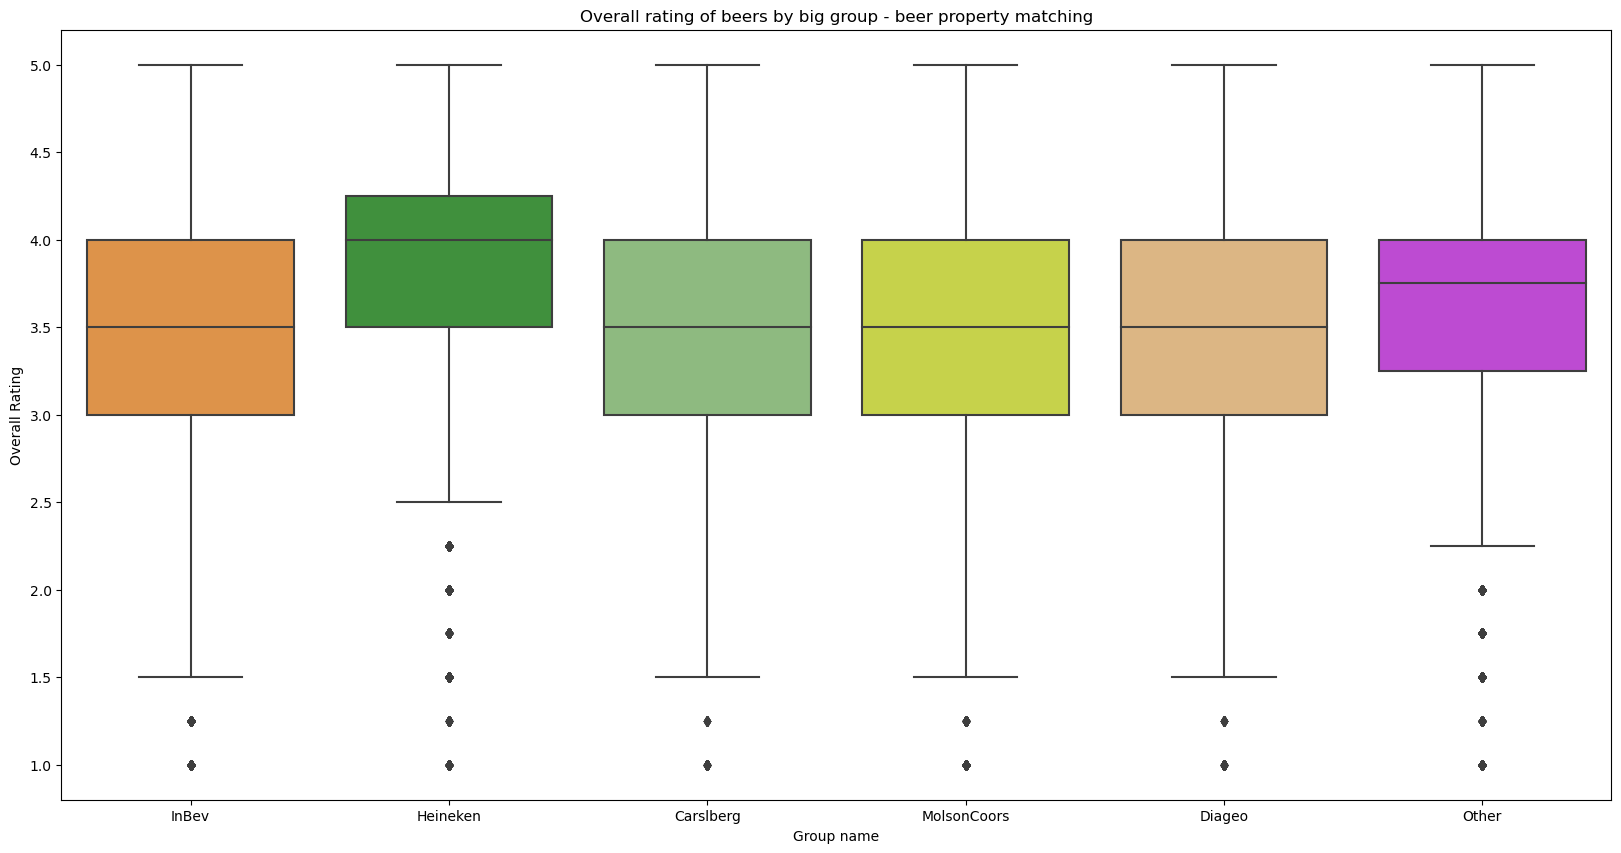

In [54]:
# plot the overall rating 
ax = sns.boxplot(x="main_group", y="overall", data=matched_abv_style, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})

plt.title('Overall rating of beers by big group - beer property matching')
plt.xlabel('Group name')
plt.ylabel('Overall Rating')
plt.savefig('beer_matching.png', transparent=True)
plt.show()

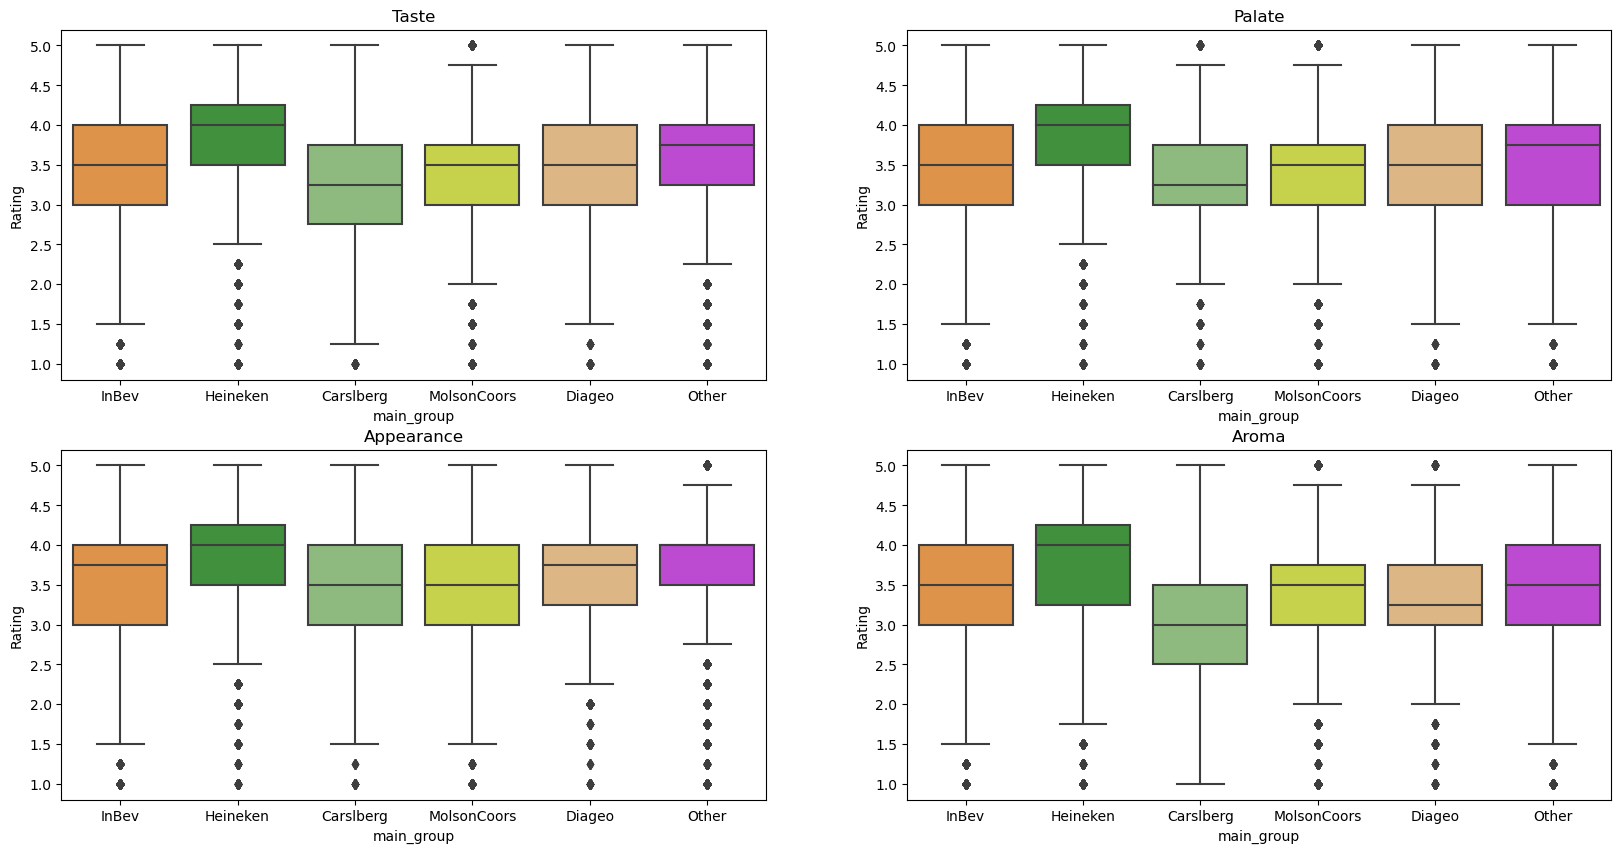

In [55]:
# plot distribution of different ratings aspects

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2, 2, 1)
sns.boxplot(x="main_group", y="taste", data=matched_abv_style, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Taste')
plt.subplot(2, 2, 2)
sns.boxplot(x="main_group", y="palate", data=matched_abv_style, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Palate')
plt.subplot(2, 2, 3)
sns.boxplot(x="main_group", y="appearance", data=matched_abv_style, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Appearance')
plt.subplot(2, 2, 4)
sns.boxplot(x="main_group", y="aroma", data=matched_abv_style, order=['InBev', 'Heineken', 'Carslberg', 'MolsonCoors', 'Diageo', 'Other'],
                  palette={'InBev':'#f59331','Heineken':'#339e2f','Carslberg':'#89c476', 'MolsonCoors': '#d9e835', 'Other':'#cd35e8','Diageo': '#ebb875'})
plt.ylabel('Rating')
plt.title('Aroma')
plt.show()



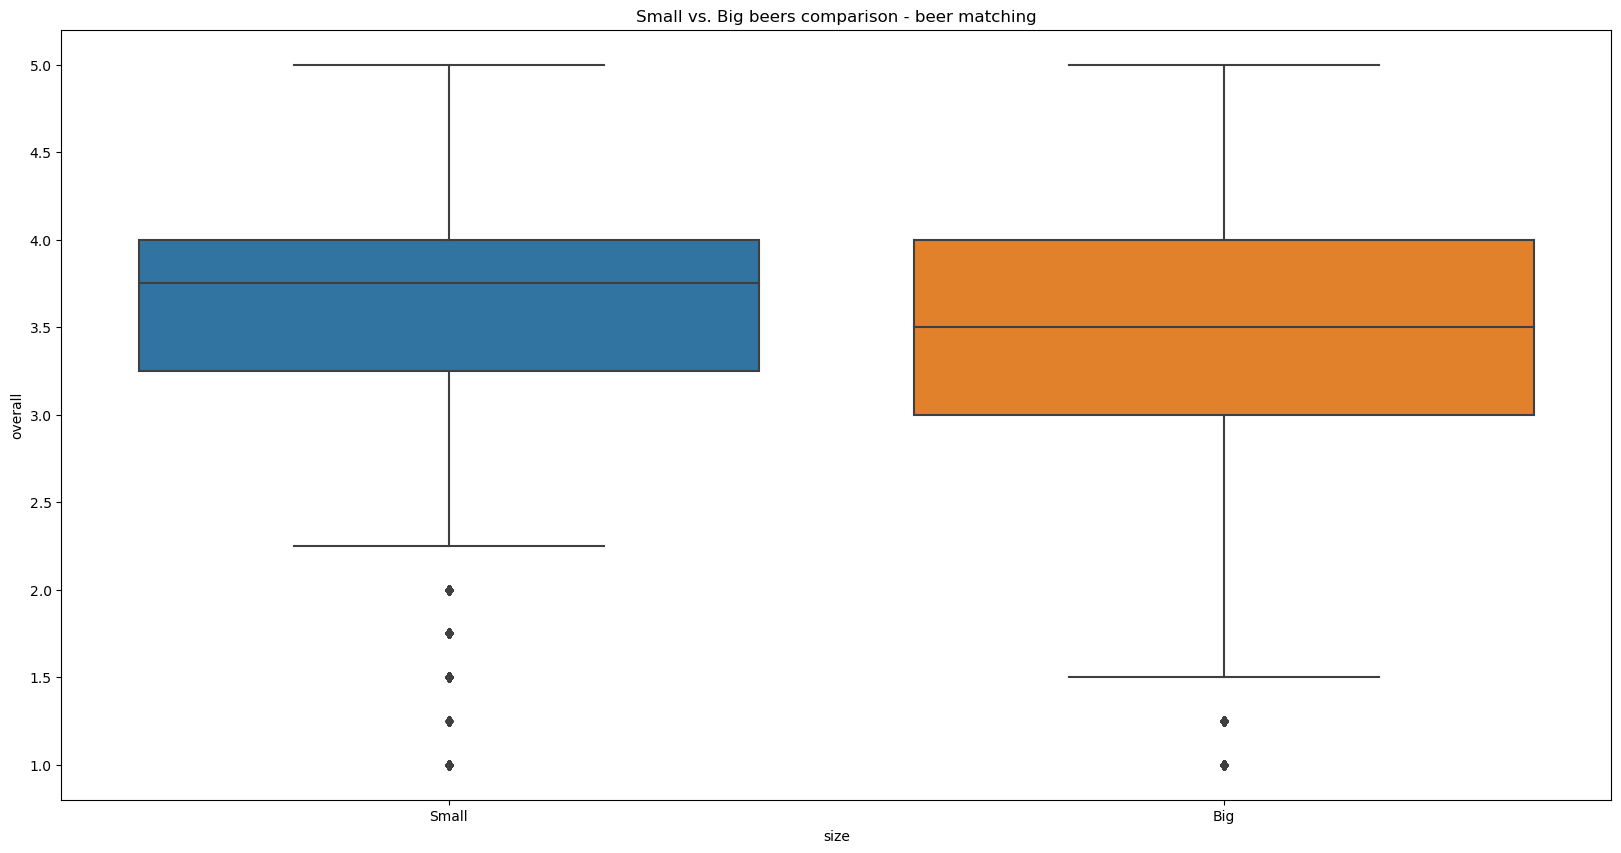

In [56]:
# plot the differnce in rating for small and big beers
plt.title('Small vs. Big beers comparison - beer matching')
plt.xlabel('Comapny Size')
plt.ylabel('Overall Rating')

ax = sns.boxplot(x="size", y="overall", data=matched_abv_style)
plt.savefig('beer_matching_overall.png', transparent=True)
plt.show()


In [57]:
#We do another t-test with this matching\n
big_beer_reviews_2 = matched_abv_style[matched_abv_style['size']== 'Big']['overall'].values
small_beer_reviews_2 = matched_abv_style[matched_abv_style['size']== 'Small']['overall'].values

print(len(big_beer_reviews_2))
print(len(small_beer_reviews_2))

ttest_rel(big_beer_reviews_2,small_beer_reviews_2, alternative = 'less')

173231
173231


TtestResult(statistic=-64.19115719235893, pvalue=0.0, df=173230)